#### JODA 2019 harjoitustyö – vaihe 1: kehitysympäristö
Osku Mäkkylä osku.makkyla@tuni.fi

Harjoitustyön ensimmäisessä vaiheessa loin kehitysympäristön kahden pisteen toteutuksella, eli asensin Anacondan omalle koneelleni. Valitsin tämän, koska minulla on ollut Anaconda aiemminkin, ja siinä on kaikki tarvittavat harjoitustyön tekemiseen. Myös muut kurssilaiset tähän mennessä valitsivat tämän, niin saan heiltä hyviä neuvoja, kiitos siis heille.
Tässä kuva kesken asennuksen. Asennustiedoston sain täältä:  https://www.anaconda.com/distribution/
Tästä aloitusdokumentista oli myös apua mm. Jupyterin käynnistämiseen: http://docs.anaconda.com/anaconda/user-guide/getting-started/

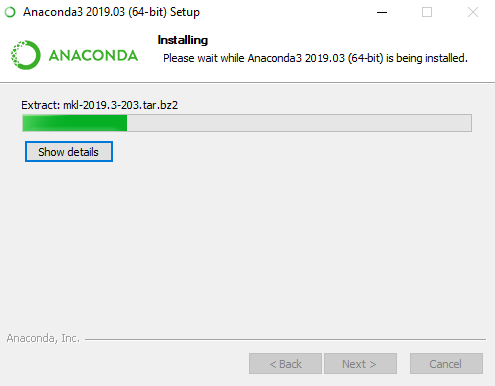
Kuva asennuksesta

Asennuksen jälkeen avasin Jupyter-työkirjan Anaconda Navigatorista.
 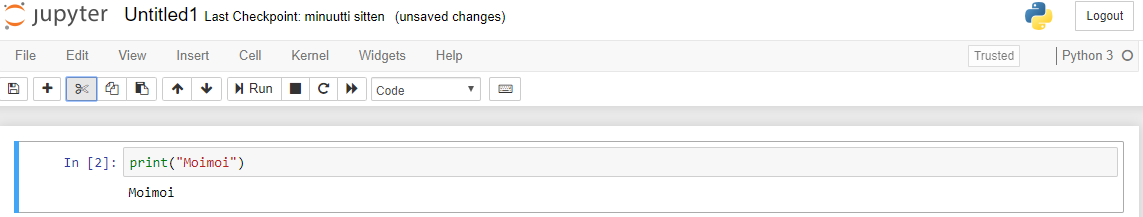
Näkymä Jupyter-työkirjasta.

Helppoa ja vaikeaa
1. Helppoa löytää ja asentaa Anaconda
2. Vaikeaa käyttää sitä. Tämä on ensimmäinen kerta, kun teen sillä jotain käytännössä. Saa nähdä mitä tästä harkasta tulee.
3. En myöskään ole käyttänyt Jupyteria ennen, niin alku oli vähän hankala.


#### JODA 2019 harjoitustyö – vaihe 2: datan kerääminen
Osku Mäkkylä osku.makkyla@tuni.fi

Harjoitustyön toisessa vaiheessa päädyin käyttämään valmiiksi kerättyä datapakettia, lähinnä siksi, että se on helppo ja suoraviivainen tapa työstää dataa. Oma osaaminen ei lonkalta riittänyt keräämään sitä itse, eikä aika riitä tällä hetkellä opettelemiseen.
Aluksi oli ongelmia Jupyterin avaamisessa komentokehotteilla Windowsin terminaalilla tai Anacondan Navigatorilla. Stackoverflowsta löysin kuitenkin ohjeet Jupyter-työpöydän käynnistämiseen tällä komennolla.

https://stackoverflow.com/questions/41034866/running-jupyter-via-command-line-on-windows 

Päädyin keräämään valmiista Airbnb datapaketista Madridin vuokrauskohteet, koska olen ollut siellä vaihdossa niin kaupunki tuntui luontevalta. Tämän sai suoraan täältä: http://insideairbnb.com/get-the-data.html ja tiedoston nimi on ”listings.csv.gz”. Tiedosto oli pakattu, joten jouduin lataamaan purkuohjelmiston ”BreeZip”, jotta sain tiedot excelissä luettavaan muotoon.

Tältä datasetti näytti Jupyterissa.

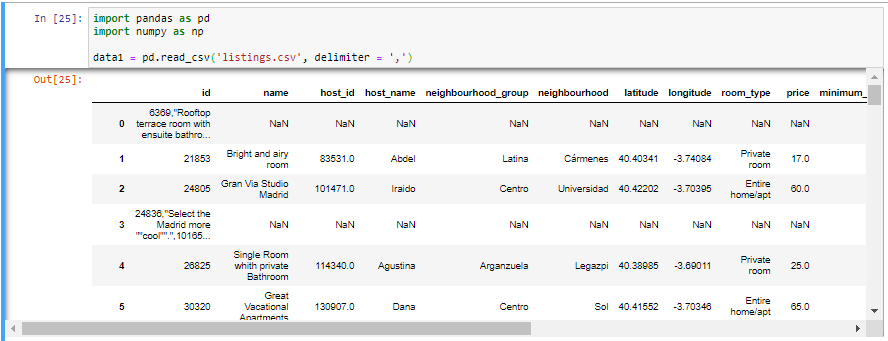

Ohjeita pandan käyttöön ja datasetin tuomiseen sain täältä: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

Helppoa ja vaikeaa:
1. Ohjeiden löytäminen helppoa tämän vaiheen jo tehneiden opiskelijoiden ansiosta.
2. Helppoa soveltaa löydettyjä ohjeita omaan aineistoon.
3. Vaikeaa miettiä mitä ongelmaa lähteä ratkomaan tämän datan avulla. Olisi pitänyt määritellä ongelma ja etsiä data sen jälkeen, mutta tämä oli helpompaa datan kannalta.

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter

#columns = ['name', 'price','neighbourhood_group', 'neighbourhood', ]
data1 = pd.read_csv('listings.csv', delimiter = ',') #, usecols=columns)
data1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365;;
0,"6369,""Rooftop terrace room with ensuite bathro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21853,Bright and airy room,83531.0,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17.0,4.0,33.0,2018-07-15,0.61,2.0,0;;
2,24805,Gran Via Studio Madrid,101471.0,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,60.0,5.0,2.0,2017-07-03,0.04,1.0,313;;
3,"24836,""Select the Madrid more """"cool""""."",10165...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26825,Single Room whith private Bathroom,114340.0,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25.0,2.0,126.0,2019-02-13,1.17,1.0,287;;


In [18]:
data1.groupby(['neighbourhood_group']).count().sort_values(by = ['id'], ascending = False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365;;
neighbourhood_group,,,,,,,,,,,,,,,
Centro,7801,7801,7801,7801,7801,7801,7801,7801,7801,7801,7801,6645,6645,7801,7801
Salamanca,1019,1019,1019,1019,1019,1019,1019,1019,1019,1019,1019,815,815,1019,1019
Chamberí,859,859,859,858,859,859,859,859,859,859,859,662,662,859,859
Arganzuela,840,840,840,840,840,840,840,840,840,840,840,687,687,840,840
Tetuán,601,601,601,600,601,601,601,601,601,601,601,470,470,601,601
Retiro,495,495,495,495,495,495,495,495,495,495,495,417,417,495,495
Moncloa - Aravaca,468,468,468,468,468,468,468,468,468,468,468,369,369,468,468
Latina,438,438,438,438,438,438,438,438,438,438,438,333,333,438,438
Carabanchel,397,397,397,397,397,397,397,397,397,397,397,315,315,397,397


In [19]:
data1.groupby(['neighbourhood_group','neighbourhood']).count()

id  name  host_id  \
neighbourhood_group   neighbourhood                                       
Arganzuela            Acacias                        158   158      158   
                      Atocha                          12    12       12   
                      Chopera                        124   124      124   
                      Delicias                       127   127      127   
                      Imperial                       102   102      102   
                      Legazpi                         38    38       38   
                      Palos de Moguer                279   279      279   
Barajas               Aeropuerto                      11    11       11   
                      Alameda de Osuna                24    24       24   
                      Casco Histórico de Barajas      20    20       20   
                      Corralejos                       5     5        5   
                      Timón                           39    39       39   
Carabanchel           Abrantes                        14    14       14   
                      Buenavista                      23    23       23   
                      Comillas                        87    87       87   
                      Opañel                          74    74       74   
                      Puerta Bonita                   28    28       28   
                      San Isidro                     107   107      107   
                      Vista Alegre                    64    64       64   
Centro                Cortes                         771   771      771   
                      Embajadores                   2128  2128     2128   
                      Justicia                       972   972      972   
                      Palacio                       1215  1215     1215   
                      Sol                           1088  1088     1088   
                      Universidad                   1627  1627     1627   
Chamartín             Castilla                        35    35       35   
                      Ciudad Jardín                   60    60       60   
                      El Viso                         56    56       56   
                      Hispanoamérica                  74    74       74   
                      Nueva España                    50    50       50   
...                                                  ...   ...      ...   
San Blas - Canillejas Amposta                          3     3        3   
                      Arcos                           20    20       20   
                      Canillejas                      15    15       15   
                      Hellín                          10    10       10   
                      Rejas                           36    36       36   
                      Rosas                           33    33       33   
                      Salvador                         7     7        7   
                      Simancas                        53    53       53   
Tetuán                Almenara                        61    61       61   
                      Bellas Vistas                  124   124      124   
                      Berruguete                      85    85       85   
                      Castillejos                    113   113      113   
                      Cuatro Caminos                 150   150      150   
                      Valdeacederas                   68    68       68   
Usera                 Almendrales                     43    43       43   
                      Moscardó                        68    68       68   
                      Orcasitas                       11    11       11   
                      Orcasur                         18    18       18   
                      Pradolongo                      18    18       18   
                      San Fermín                      31    31       31   
                      Zofío                           33    33       33   
Vicá

#### JODA 2019 harjoitustyö – vaihe 3: datan jalostaminen
Osku Mäkkylä osku.makkyla@tuni.fi

Päätin tarkastella Madridin eri kaupunginosien vuokralla olevien asuntojen määrää, vuokrataanko koko asunto vai yksittäisiä huoneita, keskiarvo hintaa ja listauksen suosiota sen perusteella, kuinka monta katselukertaa ilmoituksella on.

Ensin tein dataframen edellä mainittujen attribuuttien mukaan: 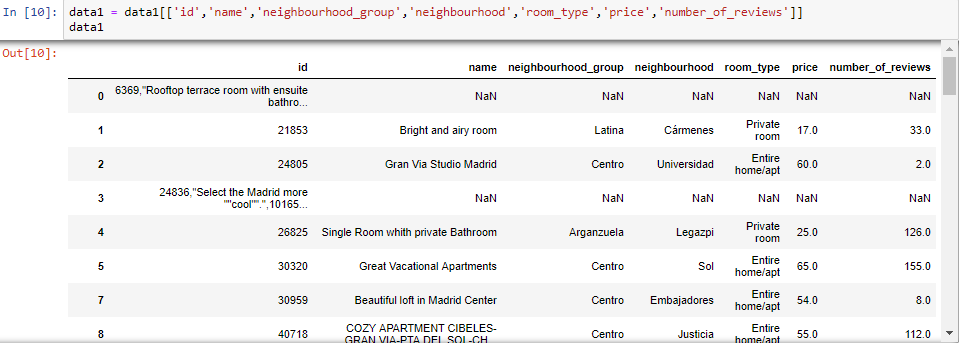

Tämän jälkeen poistin seuraavat rivit, jos:
 - kaupunginosatiedot ovat tyhjiä
 - hintatiedot ovat tyhjiä
 - katselukerrat ovat tyhjiä
 
Tämä onnistui suoraan seuraavilla komennoilla:

data1 = data1[data1.neighbourhood_group != 0]

data1 = data1[data1.neighbourhood != 0]
 
data1 = data1[data1.price != 0]
 
data1 = data1[data1.number_of_reviews != 0]

Jotta edellinen kohta onnistuisi, korvasin NaN-arvot nollalla käskyllä data1.fillna(0) <-- Olisi onnistunut muuten myös dropna käskyllä

Ennen siivoamista rivejä oli 17704 ja siivoamisen jälkeen 12462.

Yllä tehtyjen toimenpiteiden jälkeen datasetti näytti tältä:
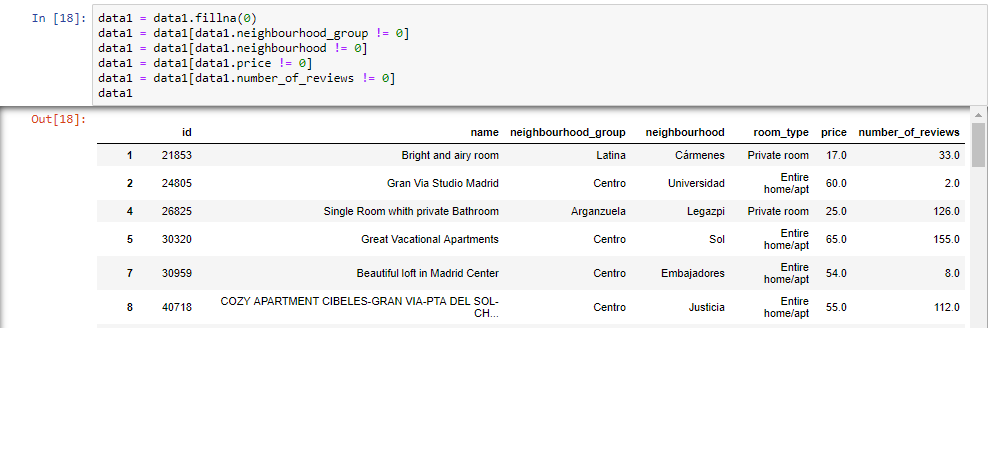


In [20]:
data1 = data1[['id','name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','reviews_per_month']]
data1

,id,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
0,"6369,""Rooftop terrace room with ensuite bathro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21853,Bright and airy room,Latina,Cármenes,Private room,17.0,4.0,33.0,0.61
2,24805,Gran Via Studio Madrid,Centro,Universidad,Entire home/apt,60.0,5.0,2.0,0.04
3,"24836,""Select the Madrid more """"cool""""."",10165...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26825,Single Room whith private Bathroom,Arganzuela,Legazpi,Private room,25.0,2.0,126.0,1.17
5,30320,Great Vacational Apartments,Centro,Sol,Entire home/apt,65.0,3.0,155.0,1.47
6,30711,Sunny bedroom in Madrid centertown,Arganzuela,Palos de Moguer,Private room,149.0,2.0,0.0,NaN
7,30959,Beautiful loft in Madrid Center,Centro,Embajadores,Entire home/apt,54.0,3.0,8.0,0.17
8,40718,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,Centro,Justicia,Entire home/apt,55.0,3.0,112.0,1.07
9,40916,Holiday Apartment Madrid Center,Centro,Universidad,Entire home/apt,90.0,3.0,29.0,0.29


In [21]:
data1 = data1.fillna(0)
data1 = data1[data1.neighbourhood_group != 0]
data1 = data1[data1.neighbourhood != 0]
data1 = data1[data1.price != 0]
data1 = data1[data1.number_of_reviews != 0]
data1 = data1[data1.minimum_nights != 0]
data1 = data1[data1. reviews_per_month != 0]

data1

,id,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
1,21853,Bright and airy room,Latina,Cármenes,Private room,17.0,4.0,33.0,0.61
2,24805,Gran Via Studio Madrid,Centro,Universidad,Entire home/apt,60.0,5.0,2.0,0.04
4,26825,Single Room whith private Bathroom,Arganzuela,Legazpi,Private room,25.0,2.0,126.0,1.17
5,30320,Great Vacational Apartments,Centro,Sol,Entire home/apt,65.0,3.0,155.0,1.47
7,30959,Beautiful loft in Madrid Center,Centro,Embajadores,Entire home/apt,54.0,3.0,8.0,0.17
8,40718,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,Centro,Justicia,Entire home/apt,55.0,3.0,112.0,1.07
9,40916,Holiday Apartment Madrid Center,Centro,Universidad,Entire home/apt,90.0,3.0,29.0,0.29
11,59923,Habitación para féminas en el centro de Madrid,Centro,Palacio,Private room,40.0,1.0,14.0,0.15
12,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,Centro,Justicia,Private room,45.0,1.0,39.0,3.86
13,64131,Habitación Metro Lacoma,Fuencarral - El Pardo,Peñagrande,Private room,20.0,2.0,17.0,0.34


In [22]:
data1.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,12462.000000,12462.000000,12462.000000,12462.000000
mean,86.540523,3.528487,41.776200,1.954675
std,311.892510,15.691286,60.966175,1.909732
min,8.000000,1.000000,1.000000,0.010000
25%,38.000000,1.000000,5.000000,0.460000
50%,60.000000,2.000000,17.000000,1.320000
75%,90.000000,3.000000,53.000000,2.970000
max,9999.000000,700.000000,559.000000,20.030000


#### JODA 2019 harjoitustyö – vaihe 4: datan kuvaileminen
Osku Mäkkylä osku.makkyla@tuni.fi

Neljännessä vaiheessa kuvailen dataa paremmin erilaisilla taulukoilla ja visualisoinneilla. Aiemmat työvaiheet ovat muokanneet dataa tätä vaihetta varten, jotta visualisoinnit olisivat mahdollisimman selkeitä.

Muokkasin hieman dataframea edellisiin palautuksiin verrattuna. Otin mukaan myös minimi yöpymisajan ja katselukerrat viimeisen kuukauden ajalta.

Aluksi tein pylväsdiagrammin kuvaamaan eri kaupunginosissa listattujen asuntojen määrästä.
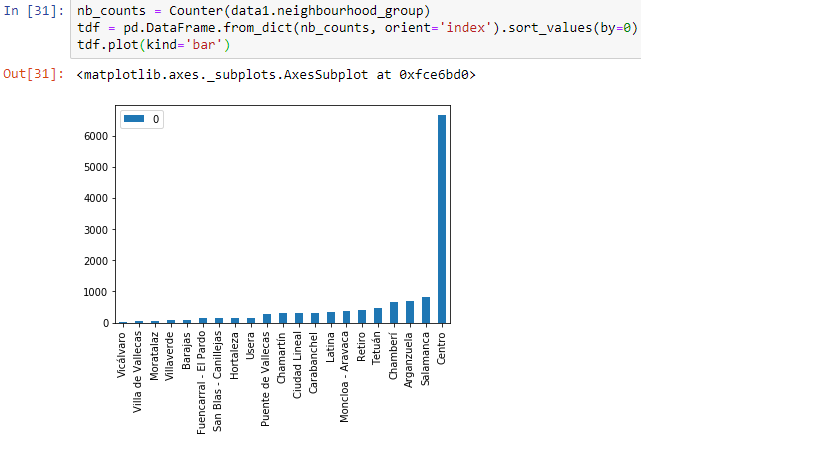
Tästä nähdään heti, että keskustassa 'Centro' on huomattavasti eniten listauksia, mikä ei ole outoa eurooppalaiselle turistikaupungille. Seuraavaksi eniten listauksia on kaupunginosista Salamanca, Arganzuela ja Chamberí, jotka kaikki sijaitsevat keskustan lähellä. Diagrammi on vähän huonosti luettava suurten erojen takia.

Seuraavaksi tulostin taulukon tarkempien arvojen saamiseksi.
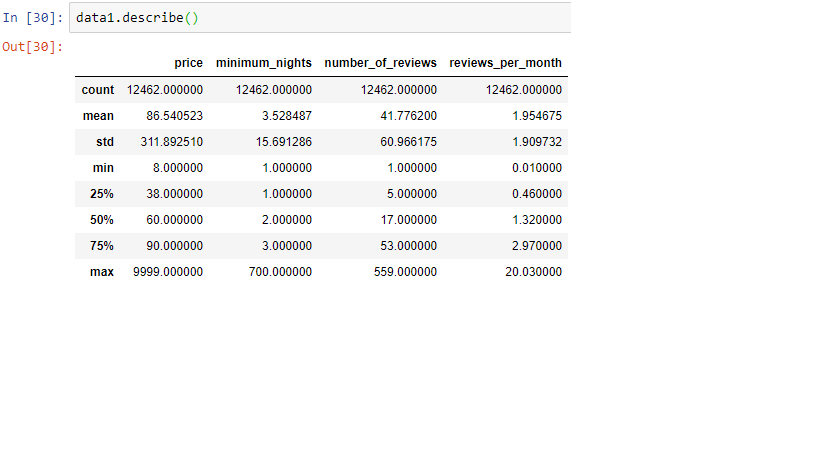
Taulukosta nähdään esimerkiksi se, että Madridissa keskiarvohinta AriBnb-asunnolle on 86,54 euroa, asuntoja katsellaan keskimäärin 41 kertaa ja minimi yöpymisaika on keskimäärin 3,5 yötä. Asuntoja oli yli 12 tuhatta, joten tehdään vielä graafinen esitys.

Scatter toiminnon koodi ei toiminut, mutta lisäämällä "plotting" koodin alkupäähän auttoi. Apu löytyi täältä: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
En osannut muokata vuokrattavan huoneiston stringiä numeeriseksi arvoksi, joten scatter ei osannut ottaa sitä mukaan, joten jätin sen pois tästä raportista :(
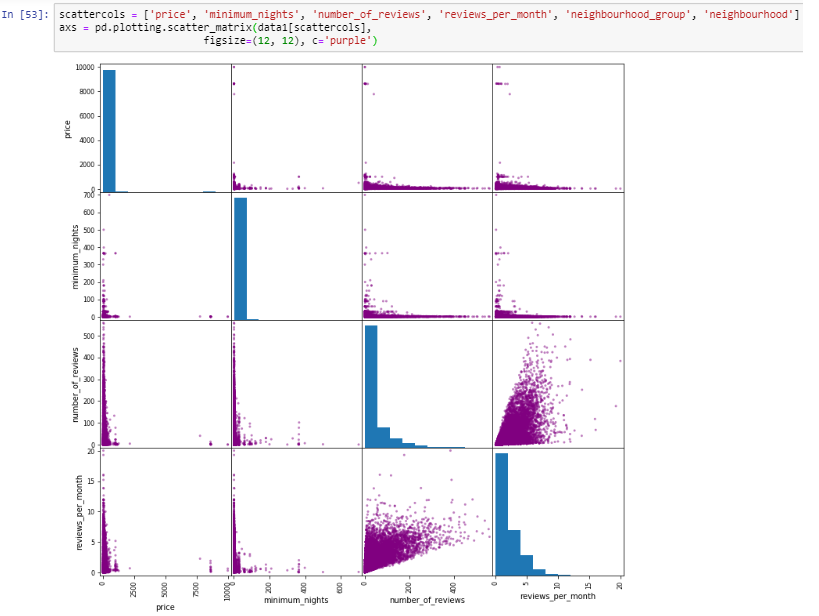


Haastavaa ja helppoa:

- Helppoa seurata ohjeita ja tehdä mallinnuksia
- Vaikeaa välillä soveltaa omaan aineistoon, tässä jäi esim. huonetyyppi pois
- Vaikeaa muokata kaavioita selvemmiksi. En tähän hätään osaa muokata esimerkiksi edeltävää pylväskaavioita tarkemmin kaupunginosien mukaan


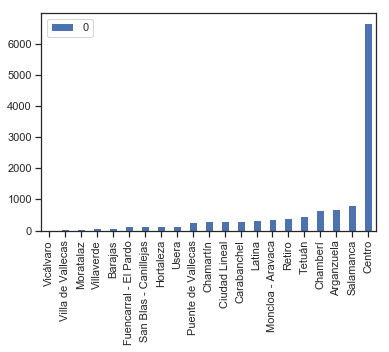

In [23]:
nb_counts = Counter(data1.neighbourhood_group)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')

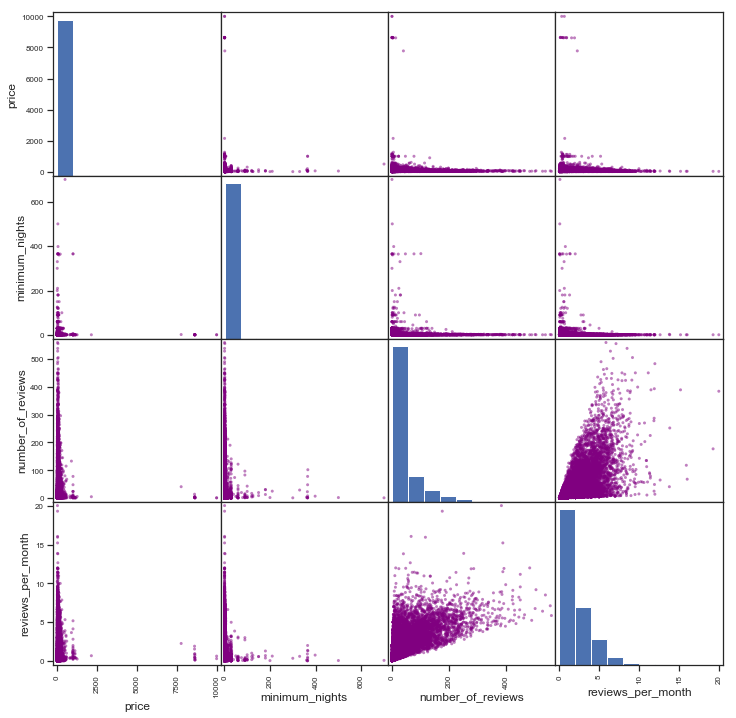

In [24]:
scattercols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'neighbourhood_group', 'neighbourhood']
axs = pd.plotting.scatter_matrix(data1[scattercols],
                        figsize=(12, 12), c='purple')

In [25]:
print(data1.corr())

                      price  minimum_nights  number_of_reviews  \
price              1.000000        0.009001          -0.036344   
minimum_nights     0.009001        1.000000          -0.040973   
number_of_reviews -0.036344       -0.040973           1.000000   
reviews_per_month -0.042331       -0.079303           0.648108   

                   reviews_per_month  
price                      -0.042331  
minimum_nights             -0.079303  
number_of_reviews           0.648108  
reviews_per_month           1.000000  


#### JODA 2019 harjoitustyö – vaihe 5: koneoppiminen
Osku Mäkkylä osku.makkyla@tuni.fi


Harjoitustyön viidennessä vaiheessa tehdään lineaarinen regressioanalyysi eri muuttujien kesken. Tässä vaiheessa oli paljon ongelmia valitsemani datasetin kanssa ja tämän https://mapr.com/blog/predicting-airbnb-listing-prices-scikit-learn-and-apache-spark/ esimerkin soveltamisen kanssa. Esimerkin kaltainen analyysi tuotti minulle vain ValueErroreita, joita en osannut korjata, joten palautan tällaisen puolikuolleen esimerkin, jotta pääsen eteenpäin. Yritän korjata asiana lopulliseen palautukseen.

Valitsemani datasetti Madridin AirBnb asunnoista ei sisältänyt tietoja esimerkiksi makuuhuoneiden tai vuodepaikkojen määrästä, enkä osannut edellisessä vaiheessa muuttaa stringiä numeeriseksi, joten kaupunginosat jäyvät pois. Näistä syistä analyysivaiheet jäivät hieman laihoiksi, kuten tässäkin.

Löysin täältä https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6 kuitenkin yksinkertaisen esimerkin, jota seurata. Sain aikaiseksi jonkinlaisen lineaarisen kaavion siitä, miten minimi yöpyminen, hinta ja kuukausittaiset katselukerrat korreloivat kokonaiskatselukertojen kanssa. 
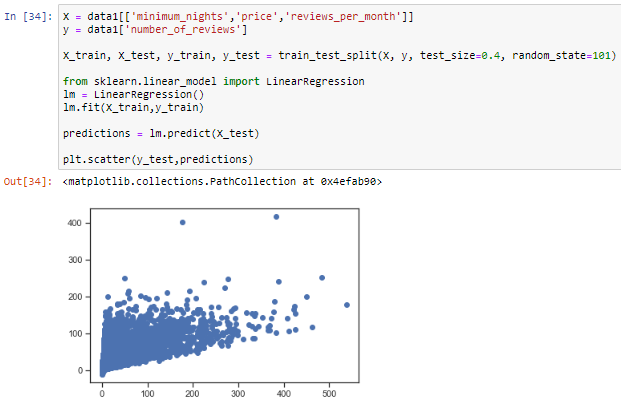

Tätä vaihetta varten jouduin importoimaan erillisen osan 'LinearRegression' sklearnista.

### Helpot ja vaikeat:

- Vaikeaa soveltaa annettua esimerkkiä omaan dataan. Toivottavasti onnistuu paremmin lopullisessa palautuksessa. Katsotaan meneekö tämä edes läpi.
- Helppoa oli soveltaa omaa löytämääni esimerkkiä. Sujui suoraviivaisesti ilman erroreita.
- Vaikeaa ymmärtää, mitä kuvaaja edes kertoo. 


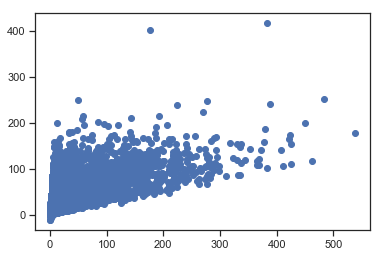

In [26]:
X = data1[['minimum_nights','price','reviews_per_month']]
y = data1['number_of_reviews']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)